In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
warnings.filterwarnings('ignore') 
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('pivot_data_Liberia_DHSdata.csv')

In [3]:
df.head()

Name  Year  Children overweight  Children overweight for their age  \
0      Bomi  2013                  6.5                                0.0   
1      Bomi  2019                  1.8                                0.9   
2      Bong  2013                  2.8                                1.2   
3      Bong  2019                  7.5                                0.6   
4  Gbarpolu  2013                  1.7                                0.4   

   Children severely stunted  Children severely underweight  \
0                       15.3                            4.0   
1                        9.1                            4.1   
2                       14.6                            6.2   
3                       11.4                            0.9   
4                        6.9                            1.8   

   Children severely wasted  Children stunted  Children underweight  \
0                       3.4              33.1                  19.7   
1                       2.7              32.4                  14.2   
2                       2.9              34.7                  17.4   
3                       1.1              37.4                   9.3   
4                       4.8              25.1                  10.8   

   Children wasted  ...  Population using surface water_df11  \
0              8.8  ...                                 18.3   
1              5.7  ...                                  3.4   
2              7.2  ...                                 17.2   
3              2.8  ...                                  8.0   
4              6.5  ...                                 28.3   

   Population using tanker truck_df11  \
0                                 0.2   
1                                 0.0   
2                                 0.0   
3                                 0.2   
4                                 0.0   

   Population using water piped into dwelling_df11  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   Population with don't know or missing information on water source_df11  \
0                                                0.0                        
1                                                NaN                        
2                                                0.4                        
3                                                NaN                        
4                                                0.0                        

   Population with missing information on treatment of water_df11  \
0                                                0.0                
1                                                0.0                
2                                                0.0                
3                                                0.1                
4                                                0.0                

   Population with unknown or missing information on round trip time to water_df11  \
0                                                0.7                                 
1                                                1.3                                 
2                                                3.4                                 
3                                                3.1                                 
4                                                0.7                                 

   Population with water 30 minutes or less away round trip_df11  \
0                                               87.3               
1                                               81.0               
2                                               74.8               
3                                               75.2               
4                                             

In [4]:
df.shape

(76, 443)

In [5]:
#print(list(df.columns))

In [6]:
# Print column names in chunks
for col in df.columns:
    print(col)

Name
Year
Children overweight
Children overweight for their age
Children severely stunted
Children severely underweight
Children severely wasted
Children stunted
Children underweight
Children wasted
Mean Body Mass Index (BMI) for women
Mean height for age of children
Mean weight for age of children
Mean weight for height of children
Number of women
Number of women (unweighted)
Women who are mildly thin according to BMI (17.0-18.4)
Women who are moderately thin according to BMI (<17.0)
Women who are obese according to BMI (>=30.0)
Women who are overweight according to BMI (25.0-29.9)
Women who are overweight or obese according to BMI (>=25.0)
Women who are thin according to BMI (<18.5)
Women with height below 145 cm
Women with normal BMI (18.5-24.9)
Antenatal care from a skilled provider
Antenatal care provider: Auxiliary nurse/midwife
Antenatal care provider: Doctor
Antenatal care provider: Missing 
Antenatal care provider: Nurse/midwife
Antenatal care provider: Other
Antenatal care pr

# Check for Duplicated Columns

In [7]:
duplicated_columns = []

# Iterate over columns and compare each with all other columns
for i, col1 in enumerate(df.columns):
    for col2 in df.columns[i + 1:]:
        if df[col1].equals(df[col2]):
            duplicated_columns.append((col1, col2))

# Display duplicated columns
print("Duplicated columns:")
for col1, col2 in duplicated_columns:
    print(f"{col1} is a duplicate of {col2}")


Duplicated columns:
Children stunted is a duplicate of Children stunted_y_df3
Children underweight is a duplicate of Children underweight_y_df3
Children wasted is a duplicate of Children wasted_y_df3
Assistance during delivery from a skilled provider is a duplicate of Assistance during delivery from a skilled provider_df3
Delivery by cesarean section is a duplicate of Delivery by cesarean section_df3
Place of delivery: Total is a duplicate of Provider of mothers' first postnatal checkup: Total
Infant mortality rate is a duplicate of Infant mortality rate_y_df3
Under-five mortality rate is a duplicate of Under-five mortality rate_y_df3
Under-five mortality rate is a duplicate of Under-five mortality rate_df11
HIV prevalence among general population_x_df3 is a duplicate of HIV prevalence among general population_y_df3
HIV prevalence among men_x_df3 is a duplicate of HIV prevalence among men_y_df3
HIV prevalence among women_x_df3 is a duplicate of HIV prevalence among women_y_df3
Children

# Drop Duplicated Columns:

In [8]:
# Find duplicated columns
duplicated_columns = []
for i, col1 in enumerate(df.columns):
    for col2 in df.columns[i + 1:]:
        if df[col1].equals(df[col2]):
            duplicated_columns.append(col2)

# Drop duplicated columns
df = df.drop(columns=duplicated_columns)

# Display the DataFrame after dropping duplicated columns
df


Name  Year  Children overweight  \
0                         Bomi  2013                  6.5   
1                         Bomi  2019                  1.8   
2                         Bong  2013                  2.8   
3                         Bong  2019                  7.5   
4                     Gbarpolu  2013                  1.7   
5                     Gbarpolu  2019                  5.8   
6                  Grand Bassa  2013                  2.1   
7                  Grand Bassa  2019                  2.9   
8             Grand Cape Mount  2013                  3.2   
9             Grand Cape Mount  2019                  3.5   
10                 Grand Gedeh  2013                  2.4   
11                 Grand Gedeh  2019                  1.1   
12                   Grand Kru  2013                  2.0   
13                   Grand Kru  2019                  1.3   
14                        Lofa  2013                  4.6   
15                        Lofa  2019                  6.1   
16                     Margibi  2013                  1.7   
17                     Margibi  2019                  5.4   
18                    Maryland  2013                  3.3   
19                    Maryland  2019                  2.5   
20                    Monrovia  2013                  3.7   
21                    Monrovia  2019                  3.3   
22                    Monrovia  2007                  4.1   
23                    Monrovia  2011                  NaN   
24  Montserrado incl. Monrovia  2013                  3.5   
25  Montserrado incl. Monrovia  2019                  3.3   
26                       Nimba  2013                  1.6   
27                       Nimba  2019                  5.1   
28               North Central  2013                  2.5   
29               North Central  2019                  6.1   
30               North Central  2007                  3.9   
31               North Central  2011                  NaN   
32               North Western  2013                  3.8   
33               North Western  2019                  3.3   
34               North Western  2007                  2.9   
35               North Western  2011                  NaN   
36                  River Cess  2013                  1.5   
37                  River Cess  2019                  1.5   
38                   River Gee  2013                  5.0   
39                   River Gee  2019                 11.4   
40                       Sinoe  2013                  3.4   
41                       Sinoe  2019                  3.7   
42               South Central  2013                  3.0   
43               South Central  2019                  3.5   
44               South Central  2007                  3.4   
45               South Central  2011                  NaN   
46             South Eastern A  2013                  2.5   
47             South Eastern A  2019                  2.3   
48             South Eastern A  2007                  3.6   
49             South Eastern A  2011                  NaN   
50             South Eastern B  2013                  3.1   
51             South Eastern B  2019                  3.8   
52             South Eastern B  2007                  6.1   
53             South Eastern B  2011                  NaN   
54                 Grand Gedeh  1986                  NaN   
55                    Monrovia  2009                  NaN   
56  Montserrado incl. Monrovia  1986                  NaN   
57               North Central  2009                  NaN   
58               North Western  2009                  NaN   
59             Rest of Country  1986                  NaN   
60                       Sinoe  1986                  NaN   
61               South Central  2009                  NaN   
62             South Eastern A  2009                  NaN   
63             South Eastern B  2009                  NaN   
64                    Monrovia  2016                  NaN   


In [9]:
df.shape

(76, 404)

In [10]:
column_names_first_73 = df.iloc[:, :73].columns.tolist()
column_names_first_73

['Name',
 'Year',
 'Children overweight',
 'Children overweight for their age',
 'Children severely stunted',
 'Children severely underweight',
 'Children severely wasted',
 'Children stunted',
 'Children underweight',
 'Children wasted',
 'Mean Body Mass Index (BMI) for women',
 'Mean height for age of children',
 'Mean weight for age of children',
 'Mean weight for height of children',
 'Number of women',
 'Number of women (unweighted)',
 'Women who are mildly thin according to BMI (17.0-18.4)',
 'Women who are moderately thin according to BMI (<17.0)',
 'Women who are obese according to BMI (>=30.0)',
 'Women who are overweight according to BMI (25.0-29.9)',
 'Women who are overweight or obese according to BMI (>=25.0)',
 'Women who are thin according to BMI (<18.5)',
 'Women with height below 145 cm',
 'Women with normal BMI (18.5-24.9)',
 'Antenatal care from a skilled provider',
 'Antenatal care provider: Auxiliary nurse/midwife',
 'Antenatal care provider: Doctor',
 'Antenatal c

In [11]:
# Select the first 73 columns: 

df_first_73 = df.iloc[:, :73]

# Calculate the percentage of null values for each column
null_percentage = (df_first_73.isnull().mean() * 100).round(2)

print(null_percentage)

Name                                                                                            0.00
Year                                                                                            0.00
Children overweight                                                                            36.84
Children overweight for their age                                                              36.84
Children severely stunted                                                                      36.84
Children severely underweight                                                                  36.84
Children severely wasted                                                                       36.84
Children stunted                                                                               36.84
Children underweight                                                                           36.84
Children wasted                                                                            

In [12]:
print(df["Name"].value_counts())
print(df["Name"].nunique())   

Name
South Eastern B               7
South Eastern A               7
South Central                 7
North Western                 7
Monrovia                      7
North Central                 7
Montserrado incl. Monrovia    3
Grand Gedeh                   3
Sinoe                         3
Nimba                         2
River Gee                     2
River Cess                    2
Bomi                          2
Bong                          2
Maryland                      2
Margibi                       2
Lofa                          2
Grand Kru                     2
Grand Cape Mount              2
Grand Bassa                   2
Gbarpolu                      2
Rest of Country               1
Name: count, dtype: int64
22


In [13]:
print(df["Year"].value_counts())
print(df["Year"].nunique()) 

Year
2013    21
2019    21
2007     6
2011     6
2009     6
2016     6
2022     6
1986     4
Name: count, dtype: int64
8


# Histogram Plots - Childern Weight

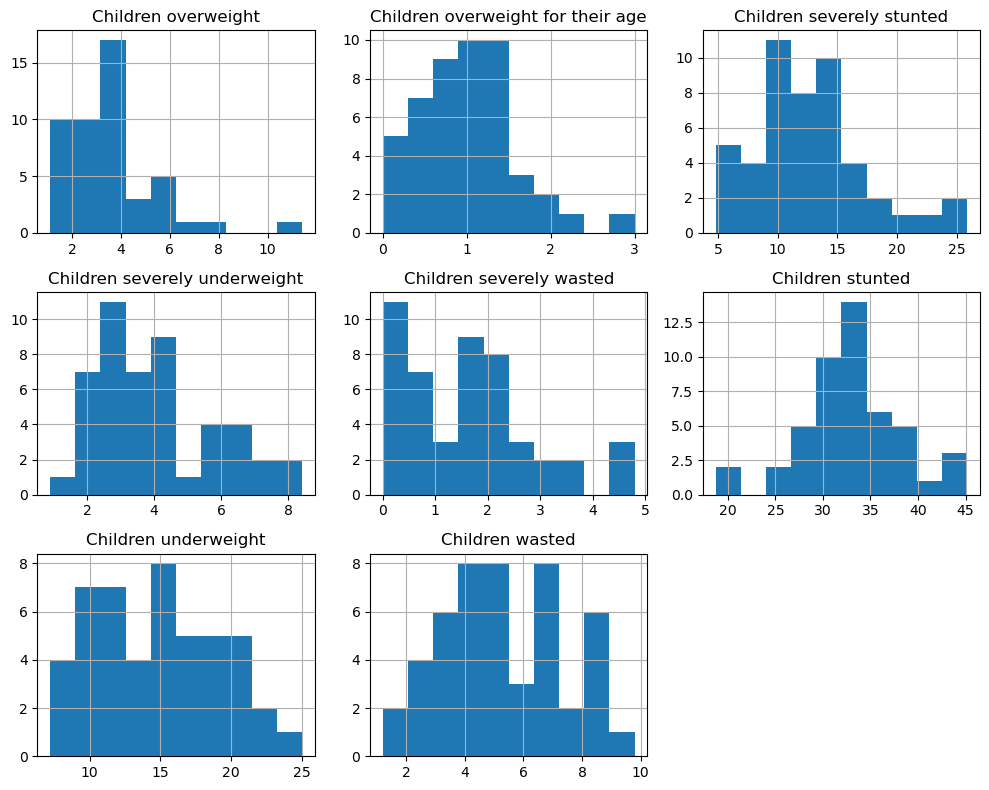

In [14]:
# Select the columns:
columns = ["Children overweight", "Children overweight for their age", 
           "Children severely stunted", "Children severely underweight", 
           "Children severely wasted", "Children stunted",
           "Children underweight","Children wasted"]

# Create histograms
df[columns].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


# Box Plot for Childern Weight and Place

In [15]:
# Box Plot for Childern weight and "Name"

# Columns to create box plots for
columns = ["Children overweight", "Children overweight for their age", 
           "Children severely stunted", "Children severely underweight", 
           "Children severely wasted", "Children stunted",
           "Children underweight","Children wasted"]

# Generate custom colors for each unique value in the 'Name' column
custom_colors = px.colors.qualitative.Plotly[:len(df['Name'].unique())]

# Create a figure for each column
figures = []
for column in columns:
    fig = px.box(df, x='Name', y=column, title=f'Box Plot for "{column}" and Place',
                 color='Name', color_discrete_sequence=custom_colors)
    fig.update_layout(width=1000, height=600)
    figures.append(fig)

# Display all figures
for fig in figures:
    fig.show()


# Average Values for Different Weight Categories by Place

In [16]:
# Average Values for Different Weight Categories by "Name"

columns = ["Children overweight", "Children overweight for their age", 
           "Children severely stunted", "Children severely underweight", 
           "Children severely wasted", "Children stunted",
           "Children underweight","Children wasted"]

# Group by "Name" and calculate the mean for each column
average_data = df.groupby("Name")[columns].mean().reset_index()

# Melt the DataFrame to have a single "value" column for all columns to be plotted
average_data_melted = average_data.melt(id_vars=["Name"], var_name="Category", value_name="Average Value")

# Sort the data by "Average Value" in descending order
average_data_melted_sorted = average_data_melted.sort_values(by="Average Value", ascending=False)

# Create the bar chart using plotly
fig = px.bar(average_data_melted_sorted, x="Name", y="Average Value", color="Category",
             labels={"Name": "Name", "Average Value": "Average Value", "Category": "Category"},
             title="Average Values for Different Children Weight Categories by Place")

# Set font size for x and y axis labels
fig.update_xaxes(title_font_size=12, tickfont_size=12)
fig.update_yaxes(title_font_size=12, tickfont_size=12)

# Rotate x-axis labels
# fig.update_xaxes(tickangle=90)

fig.show()


# Histogram Plots - Mean Height / Weight of Childern

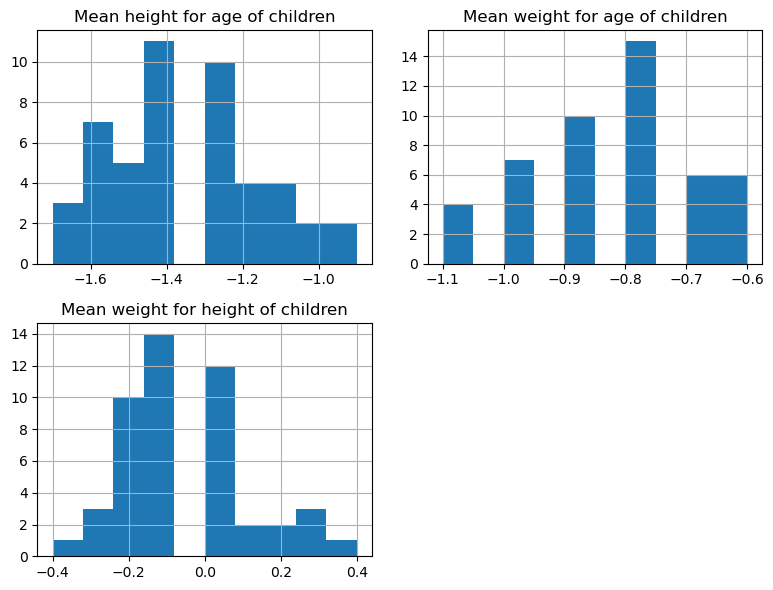

In [17]:
# Select the columns:
columns = ["Mean height for age of children","Mean weight for age of children","Mean weight for height of children"]

# Create histograms
df[columns].hist(figsize=(8, 6))
plt.tight_layout()
plt.show()

# Box Plot for Mean Height / Weight of Childern and Place

In [18]:
# Box Plot for Mean Height / Weight of Childern and "Name"

# Columns to create box plots for
columns = ["Mean height for age of children","Mean weight for age of children","Mean weight for height of children"]

# Generate custom colors for each unique value in the 'Name' column
custom_colors = px.colors.qualitative.Plotly[:len(df['Name'].unique())]

# Create a figure for each column
figures = []
for column in columns:
    fig = px.box(df, x='Name', y=column, title=f'Box Plot for "{column}" and Place',
                 color='Name', color_discrete_sequence=custom_colors)
    fig.update_layout(width=1000, height=600)
    figures.append(fig)

# Display all figures
for fig in figures:
    fig.show()

# Average Values for Mean Height / Weight by Place

In [19]:
# Average Values for Mean Height / Weight by "Name"

columns = ["Mean height for age of children","Mean weight for age of children","Mean weight for height of children"]

# Group by "Name" and calculate the mean for each column
average_data = df.groupby("Name")[columns].mean().reset_index()

# Melt the DataFrame to have a single "value" column for all columns to be plotted
average_data_melted = average_data.melt(id_vars=["Name"], var_name="Category", value_name="Average Value")

# Sort the data by "Average Value" in descending order
average_data_melted_sorted = average_data_melted.sort_values(by="Average Value", ascending=False)

# Create the bar chart using plotly
fig = px.bar(average_data_melted_sorted, x="Name", y="Average Value", color="Category",
             labels={"Name": "Name", "Average Value": "Average Value", "Category": "Category"},
             title="Average Values for Mean Height & Weight by Place")

# Set font size for x and y axis labels
fig.update_xaxes(title_font_size=12, tickfont_size=12)
fig.update_yaxes(title_font_size=12, tickfont_size=12)

# Rotate x-axis labels
# fig.update_xaxes(tickangle=90)

fig.show()

# Histogram Plots - Women IBM

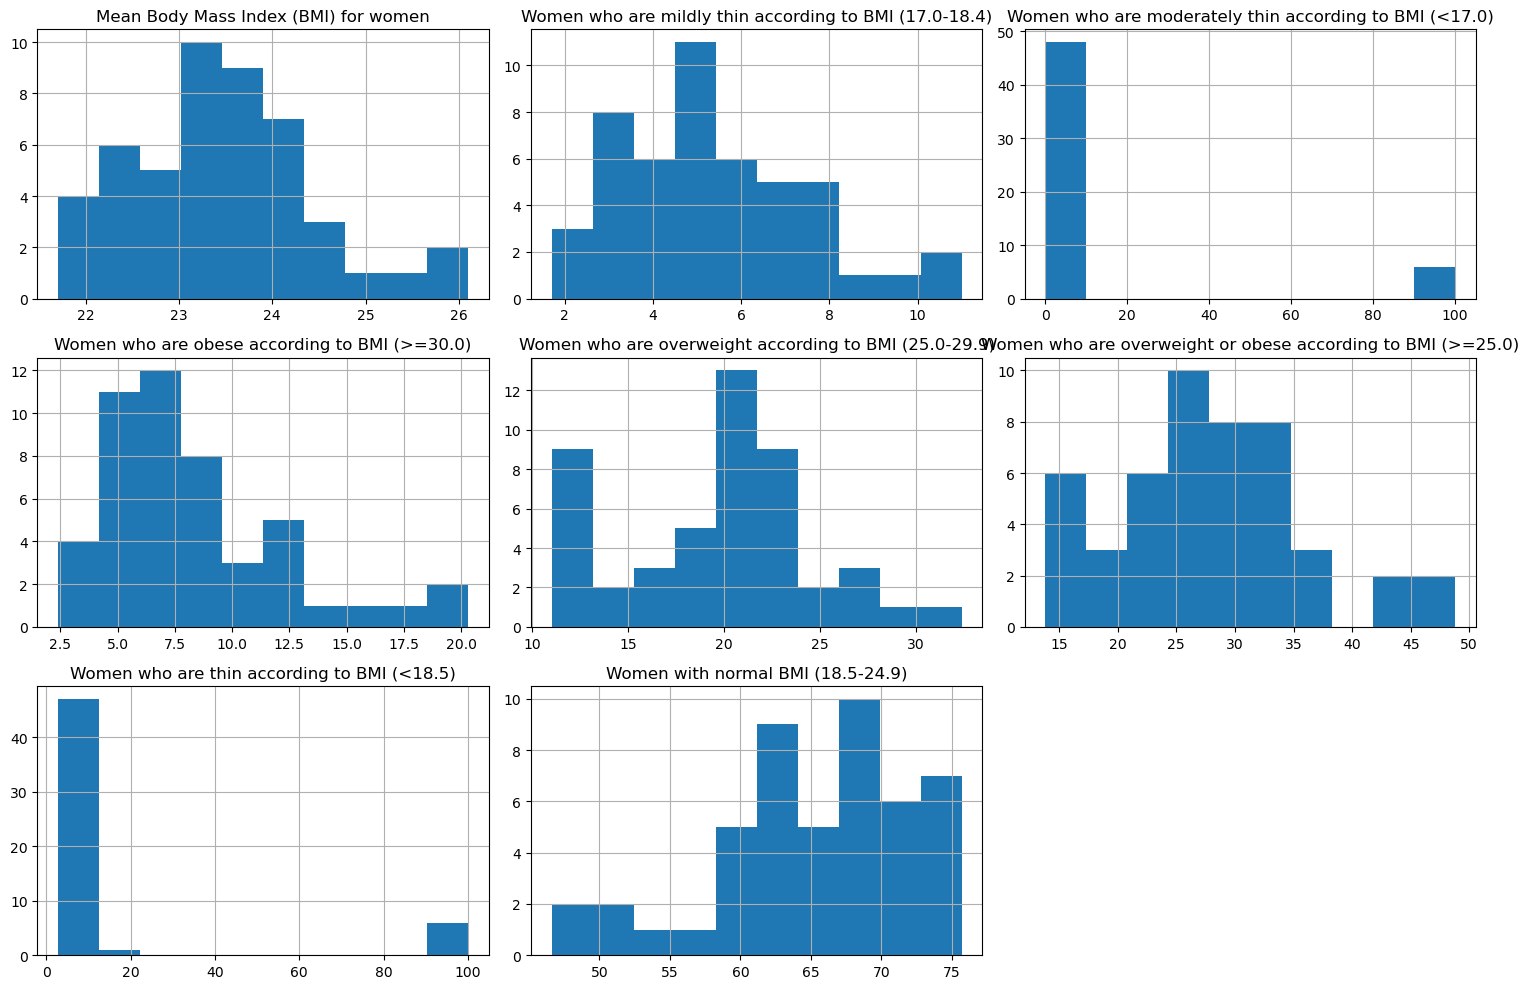

In [20]:
# Select the columns:
columns = ["Mean Body Mass Index (BMI) for women" ,                                                          
"Women who are mildly thin according to BMI (17.0-18.4)"  ,                                      
"Women who are moderately thin according to BMI (<17.0)"  ,                                    
"Women who are obese according to BMI (>=30.0)" ,                                                 
"Women who are overweight according to BMI (25.0-29.9)",                                       
"Women who are overweight or obese according to BMI (>=25.0)" ,                                
"Women who are thin according to BMI (<18.5)" ,                                                                                                                
"Women with normal BMI (18.5-24.9)"]

# Create histograms
df[columns].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Box Plot for Women IBM and Place

In [21]:
# Box Plot for Women IBM and "Name"

# Columns to create box plots for
columns = ["Mean Body Mass Index (BMI) for women" ,                                                          
"Women who are mildly thin according to BMI (17.0-18.4)"  ,                                      
"Women who are moderately thin according to BMI (<17.0)"  ,                                    
"Women who are obese according to BMI (>=30.0)" ,                                                 
"Women who are overweight according to BMI (25.0-29.9)",                                       
"Women who are overweight or obese according to BMI (>=25.0)" ,                                
"Women who are thin according to BMI (<18.5)" ,                                                                                                                
"Women with normal BMI (18.5-24.9)"]

# Generate custom colors for each unique value in the 'Name' column
custom_colors = px.colors.qualitative.Plotly[:len(df['Name'].unique())]

# Create a figure for each column
figures = []
for column in columns:
    fig = px.box(df, x='Name', y=column, title=f'Box Plot for "{column}" and Place',
                 color='Name', color_discrete_sequence=custom_colors)
    fig.update_layout(width=1000, height=600)
    figures.append(fig)

# Display all figures
for fig in figures:
    fig.show()

# Average Values for Women IBM by Place

In [22]:
# Average Values for Women IBM by "Name"

columns = ["Mean Body Mass Index (BMI) for women" ,                                                          
"Women who are mildly thin according to BMI (17.0-18.4)"  ,                                      
"Women who are moderately thin according to BMI (<17.0)"  ,                                    
"Women who are obese according to BMI (>=30.0)" ,                                                 
"Women who are overweight according to BMI (25.0-29.9)",                                       
"Women who are overweight or obese according to BMI (>=25.0)" ,                                
"Women who are thin according to BMI (<18.5)" ,                                                                                                                
"Women with normal BMI (18.5-24.9)"]

# Group by "Name" and calculate the mean for each column
average_data = df.groupby("Name")[columns].mean().reset_index()

# Melt the DataFrame to have a single "value" column for all columns to be plotted
average_data_melted = average_data.melt(id_vars=["Name"], var_name="Category", value_name="Average Value")

# Sort the data by "Average Value" in descending order
average_data_melted_sorted = average_data_melted.sort_values(by="Average Value", ascending=False)

# Create the bar chart using plotly
fig = px.bar(average_data_melted_sorted, x="Name", y="Average Value", color="Category",
             labels={"Name": "Name", "Average Value": "Average Value", "Category": "Category"},
             title="Average Values for Women IBM by Place")

# Set font size for x and y axis labels
fig.update_xaxes(title_font_size=12, tickfont_size=12)
fig.update_yaxes(title_font_size=12, tickfont_size=12)

# Rotate x-axis labels
# fig.update_xaxes(tickangle=90)

fig.show()

# Histogram Plots - Antenatal Care

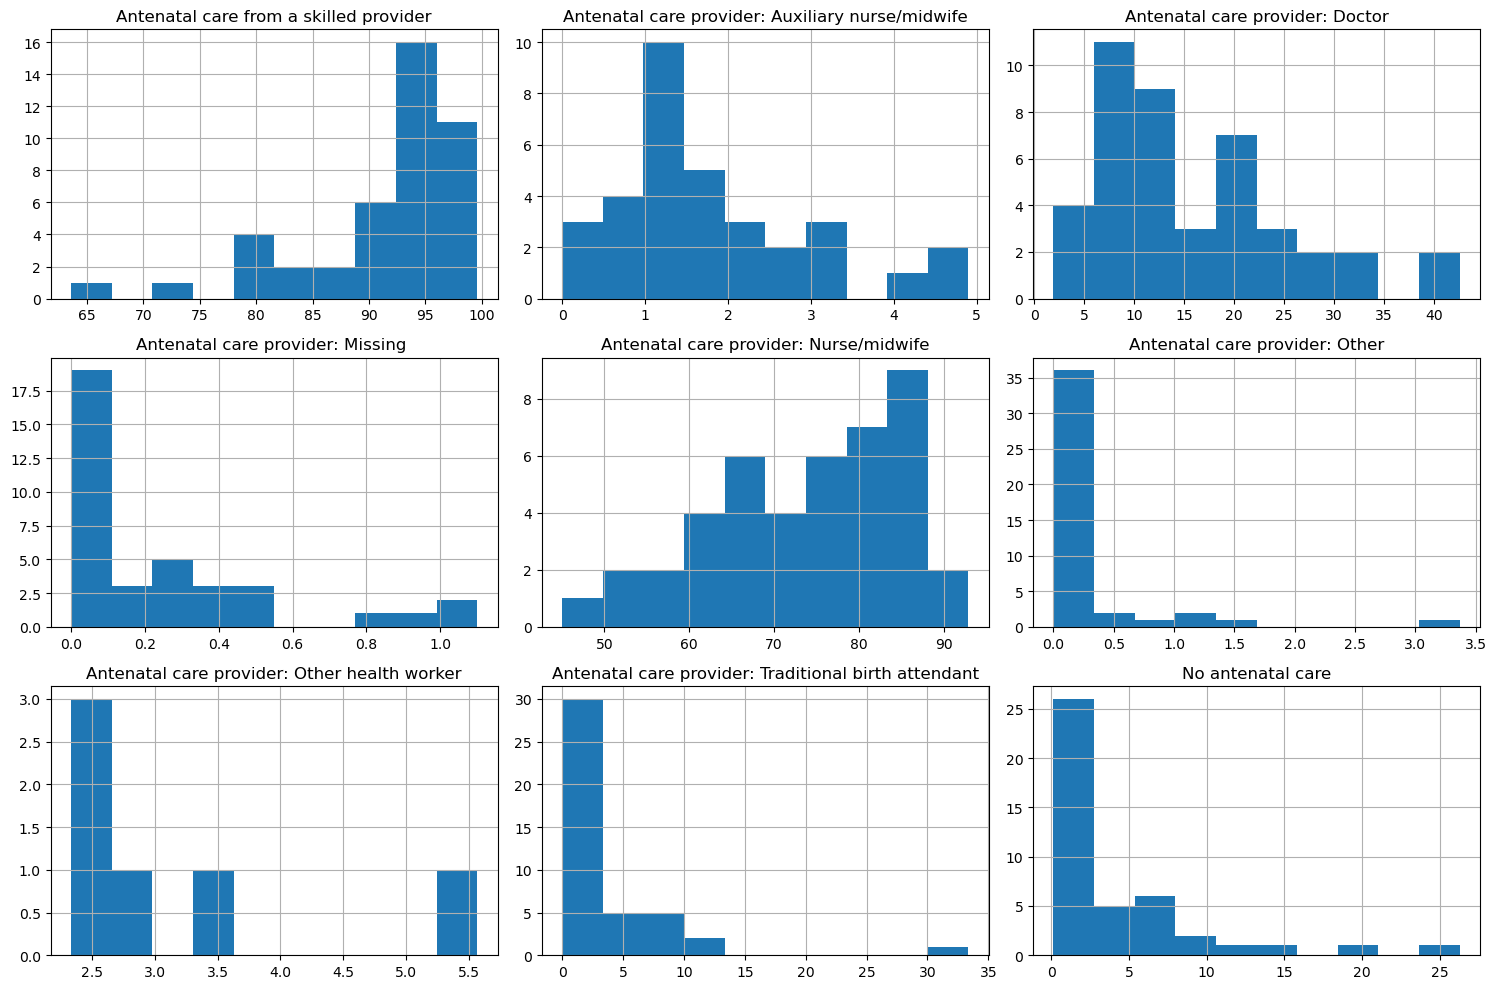

In [23]:
# Select the columns:
columns = ["Antenatal care from a skilled provider"  ,                                                     
"Antenatal care provider: Auxiliary nurse/midwife"  ,                                             
"Antenatal care provider: Doctor"   ,                                                             
"Antenatal care provider: Missing " ,                                                             
"Antenatal care provider: Nurse/midwife"  ,                                                       
"Antenatal care provider: Other" ,                                                                
"Antenatal care provider: Other health worker" ,                                                
"Antenatal care provider: Traditional birth attendant",
"No antenatal care"]

# Create histograms
df[columns].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Box Plot for Antenatal care and Place

In [24]:
# Box Plot for Antenatal Care and "Name"

# Columns to create box plots for
columns = ["Antenatal care from a skilled provider"  ,                                                     
"Antenatal care provider: Auxiliary nurse/midwife"  ,                                             
"Antenatal care provider: Doctor"   ,                                                             
"Antenatal care provider: Missing " ,                                                             
"Antenatal care provider: Nurse/midwife"  ,                                                       
"Antenatal care provider: Other" ,                                                                
"Antenatal care provider: Other health worker" ,                                                
"Antenatal care provider: Traditional birth attendant",
"No antenatal care"]

# Generate custom colors for each unique value in the 'Name' column
custom_colors = px.colors.qualitative.Plotly[:len(df['Name'].unique())]

# Create a figure for each column
figures = []
for column in columns:
    fig = px.box(df, x='Name', y=column, title=f'Box Plot for "{column}" and Place',
                 color='Name', color_discrete_sequence=custom_colors)
    fig.update_layout(width=1000, height=600)
    figures.append(fig)

# Display all figures
for fig in figures:
    fig.show()

# Average Values for Antenatal care Category by Place

In [25]:
# Average Values for Antenatal Care Category by "Name"

columns = ["Antenatal care from a skilled provider"  ,                                                     
"Antenatal care provider: Auxiliary nurse/midwife"  ,                                             
"Antenatal care provider: Doctor"   ,                                                             
"Antenatal care provider: Missing " ,                                                             
"Antenatal care provider: Nurse/midwife"  ,                                                       
"Antenatal care provider: Other" ,                                                                
"Antenatal care provider: Other health worker" ,                                                
"Antenatal care provider: Traditional birth attendant",
"No antenatal care"]

# Group by "Name" and calculate the mean for each column
average_data = df.groupby("Name")[columns].mean().reset_index()

# Melt the DataFrame to have a single "value" column for all columns to be plotted
average_data_melted = average_data.melt(id_vars=["Name"], var_name="Category", value_name="Average Value")

# Sort the data by "Average Value" in descending order
average_data_melted_sorted = average_data_melted.sort_values(by="Average Value", ascending=False)

# Create the bar chart using plotly
fig = px.bar(average_data_melted_sorted, x="Name", y="Average Value", color="Category",
             labels={"Name": "Name", "Average Value": "Average Value", "Category": "Category"},
             title="Average Values for Antenatal Care by Place")

# Set font size for x and y axis labels
fig.update_xaxes(title_font_size=12, tickfont_size=12)
fig.update_yaxes(title_font_size=12, tickfont_size=12)

# Rotate x-axis labels
# fig.update_xaxes(tickangle=90)

fig.show()

# Histogram Plots - Delivery Assistance

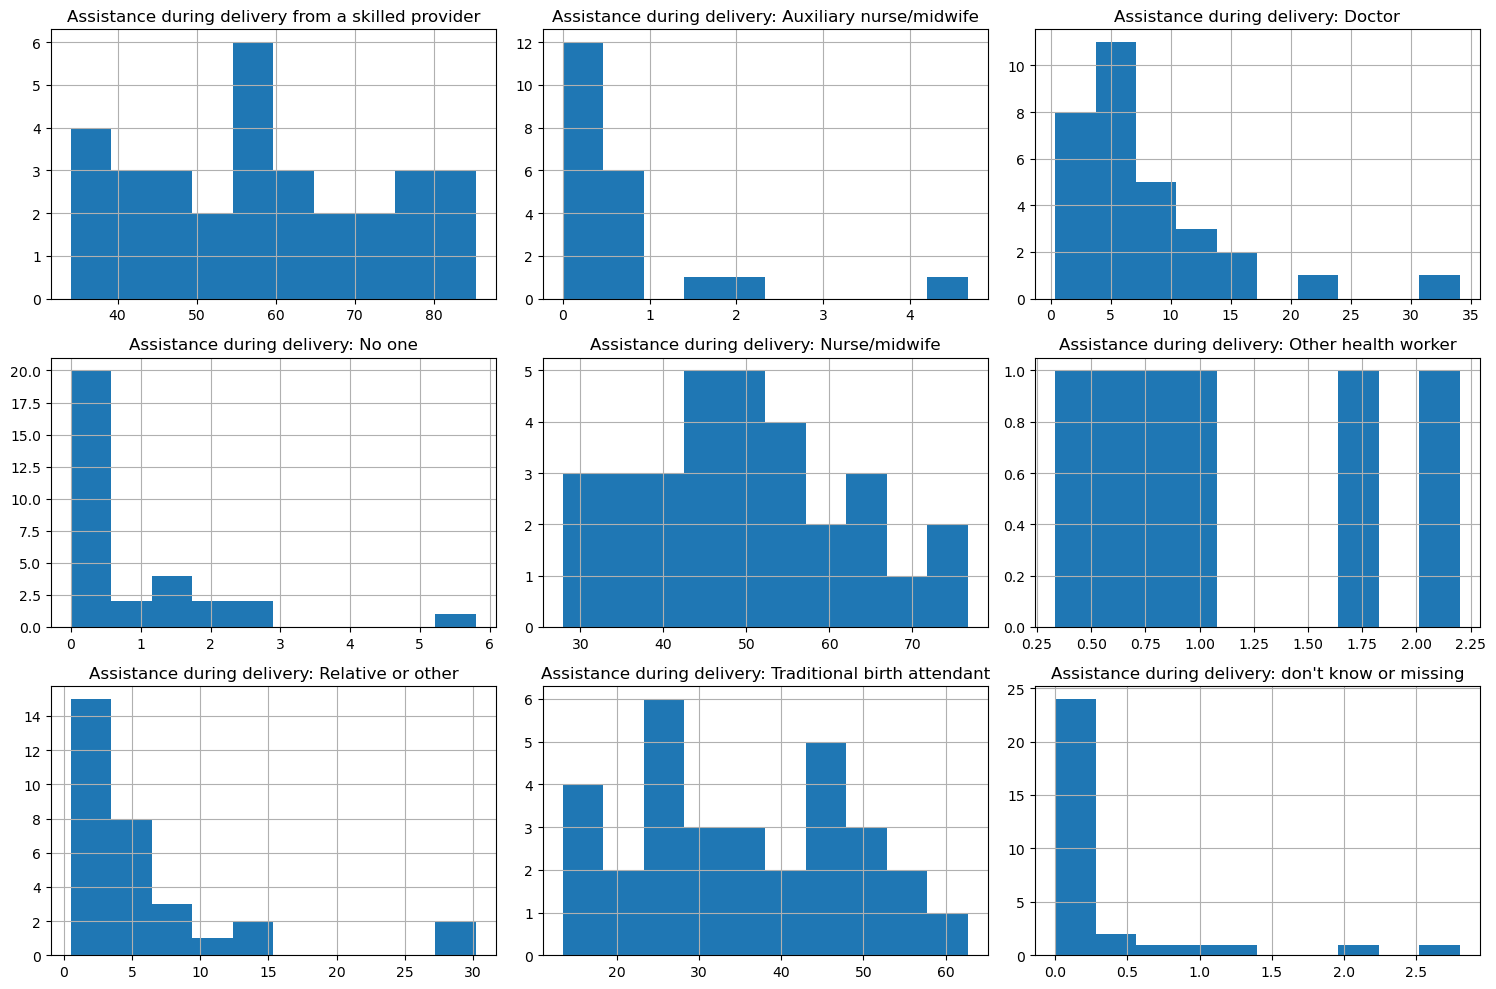

In [26]:
# Select the columns:
columns = ["Assistance during delivery from a skilled provider",                                             
"Assistance during delivery: Auxiliary nurse/midwife"  ,                                          
"Assistance during delivery: Doctor",                                                             
"Assistance during delivery: No one"  ,                                                           
"Assistance during delivery: Nurse/midwife" ,                                                     
"Assistance during delivery: Other health worker" ,                                               
"Assistance during delivery: Relative or other",                                                                                                           
"Assistance during delivery: Traditional birth attendant" ,                                      
"Assistance during delivery: don't know or missing"]

# Create histograms
df[columns].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Box Plot for Delivery Assistance and Place

In [27]:
# Box Plot for Delivery Assistance and "Name"

# Columns to create box plots for
columns = ["Assistance during delivery from a skilled provider",                                             
"Assistance during delivery: Auxiliary nurse/midwife"  ,                                          
"Assistance during delivery: Doctor",                                                             
"Assistance during delivery: No one"  ,                                                           
"Assistance during delivery: Nurse/midwife" ,                                                     
"Assistance during delivery: Other health worker" ,                                               
"Assistance during delivery: Relative or other",                                                                                                           
"Assistance during delivery: Traditional birth attendant" ,                                      
"Assistance during delivery: don't know or missing"]

# Generate custom colors for each unique value in the 'Name' column
custom_colors = px.colors.qualitative.Plotly[:len(df['Name'].unique())]

# Create a figure for each column
figures = []
for column in columns:
    fig = px.box(df, x='Name', y=column, title=f'Box Plot for "{column}" and Place',
                 color='Name', color_discrete_sequence=custom_colors)
    fig.update_layout(width=1000, height=600)
    figures.append(fig)

# Display all figures
for fig in figures:
    fig.show()

# Average Values for Delivery Assistance Category by Place

In [28]:
# Average Values for Delivery Assistance Category by "Name"

columns = ["Assistance during delivery from a skilled provider",                                             
"Assistance during delivery: Auxiliary nurse/midwife"  ,                                          
"Assistance during delivery: Doctor",                                                             
"Assistance during delivery: No one"  ,                                                           
"Assistance during delivery: Nurse/midwife" ,                                                     
"Assistance during delivery: Other health worker" ,                                               
"Assistance during delivery: Relative or other",                                                                                                           
"Assistance during delivery: Traditional birth attendant" ,                                      
"Assistance during delivery: don't know or missing"]

# Group by "Name" and calculate the mean for each column
average_data = df.groupby("Name")[columns].mean().reset_index()

# Melt the DataFrame to have a single "value" column for all columns to be plotted
average_data_melted = average_data.melt(id_vars=["Name"], var_name="Category", value_name="Average Value")

# Sort the data by "Average Value" in descending order
average_data_melted_sorted = average_data_melted.sort_values(by="Average Value", ascending=False)

# Create the bar chart using plotly
fig = px.bar(average_data_melted_sorted, x="Name", y="Average Value", color="Category",
             labels={"Name": "Name", "Average Value": "Average Value", "Category": "Category"},
             title="Average Values for Delivery Assistance by Place")

# Set font size for x and y axis labels
fig.update_xaxes(title_font_size=12, tickfont_size=12)
fig.update_yaxes(title_font_size=12, tickfont_size=12)

# Rotate x-axis labels
# fig.update_xaxes(tickangle=90)

fig.show()

# Histogram Plots - Treatment

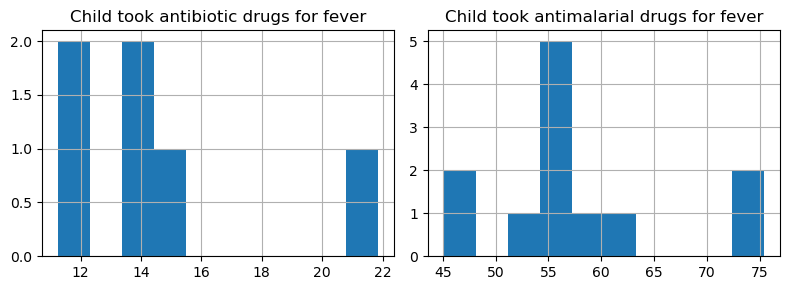

In [29]:
# Select the columns:
columns = ["Child took antibiotic drugs for fever" ,                                                       
"Child took antimalarial drugs for fever" ]

# Create histograms
df[columns].hist(figsize=(8, 3))
plt.tight_layout()
plt.show()

# Box Plot for Treatment and Place

In [30]:
# Box Plot for Treatment and "Name"

# Columns to create box plots for
columns = ["Child took antibiotic drugs for fever" ,                                                       
"Child took antimalarial drugs for fever" ]

# Generate custom colors for each unique value in the 'Name' column
custom_colors = px.colors.qualitative.Plotly[:len(df['Name'].unique())]

# Create a figure for each column
figures = []
for column in columns:
    fig = px.box(df, x='Name', y=column, title=f'Box Plot for "{column}" and Place',
                 color='Name', color_discrete_sequence=custom_colors)
    fig.update_layout(width=1000, height=600)
    figures.append(fig)

# Display all figures
for fig in figures:
    fig.show()

# Average Values for Treatment Category by Place

In [31]:
# Average Values for Treatment Category Category by "Name"

columns = ["Child took antibiotic drugs for fever" ,                                                       
"Child took antimalarial drugs for fever" ]

# Group by "Name" and calculate the mean for each column
average_data = df.groupby("Name")[columns].mean().reset_index()

# Melt the DataFrame to have a single "value" column for all columns to be plotted
average_data_melted = average_data.melt(id_vars=["Name"], var_name="Category", value_name="Average Value")

# Sort the data by "Average Value" in descending order
average_data_melted_sorted = average_data_melted.sort_values(by="Average Value", ascending=False)

# Create the bar chart using plotly
fig = px.bar(average_data_melted_sorted, x="Name", y="Average Value", color="Category",
             labels={"Name": "Name", "Average Value": "Average Value", "Category": "Category"},
             title="Average Values for Treatment Category by Place")

# Set font size for x and y axis labels
fig.update_xaxes(title_font_size=12, tickfont_size=12)
fig.update_yaxes(title_font_size=12, tickfont_size=12)

# Rotate x-axis labels
# fig.update_xaxes(tickangle=90)

fig.show()

# Histogram Plots - Symptoms

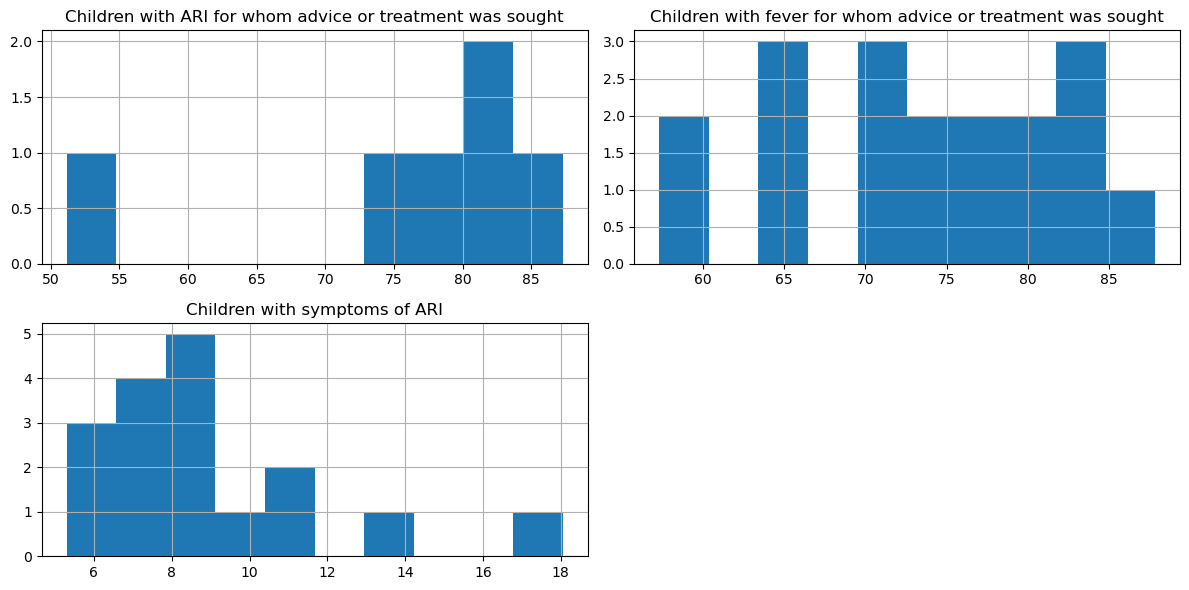

In [32]:
# Select the columns:
columns = ["Children with ARI for whom advice or treatment was sought" ,                                    
"Children with fever for whom advice or treatment was sought"  ,                                  
"Children with symptoms of ARI" ]

# Create histograms
df[columns].hist(figsize=(12, 6))
plt.tight_layout()
plt.show()

# Box Plot for Symptoms and Place

In [33]:
# Box Plot for Symptoms and "Name"

# Columns to create box plots for
columns = ["Children with ARI for whom advice or treatment was sought" ,                                    
"Children with fever for whom advice or treatment was sought"  ,                                  
"Children with symptoms of ARI" ]

# Generate custom colors for each unique value in the 'Name' column
custom_colors = px.colors.qualitative.Plotly[:len(df['Name'].unique())]

# Create a figure for each column
figures = []
for column in columns:
    fig = px.box(df, x='Name', y=column, title=f'Box Plot for "{column}" and Place',
                 color='Name', color_discrete_sequence=custom_colors)
    fig.update_layout(width=1000, height=600)
    figures.append(fig)

# Display all figures
for fig in figures:
    fig.show()

# Average Values for Symptoms Category by Place

In [34]:
# Average Values for Symptoms Category Category by "Name"

columns = ["Children with ARI for whom advice or treatment was sought" ,                                    
"Children with fever for whom advice or treatment was sought"  ,                                  
"Children with symptoms of ARI" ]

# Group by "Name" and calculate the mean for each column
average_data = df.groupby("Name")[columns].mean().reset_index()

# Melt the DataFrame to have a single "value" column for all columns to be plotted
average_data_melted = average_data.melt(id_vars=["Name"], var_name="Category", value_name="Average Value")

# Sort the data by "Average Value" in descending order
average_data_melted_sorted = average_data_melted.sort_values(by="Average Value", ascending=False)

# Create the bar chart using plotly
fig = px.bar(average_data_melted_sorted, x="Name", y="Average Value", color="Category",
             labels={"Name": "Name", "Average Value": "Average Value", "Category": "Category"},
             title="Average Values for Symptoms Category by Place")

# Set font size for x and y axis labels
fig.update_xaxes(title_font_size=12, tickfont_size=12)
fig.update_yaxes(title_font_size=12, tickfont_size=12)

# Rotate x-axis labels
# fig.update_xaxes(tickangle=90)

fig.show()

# Histogram Plots - Antenatal / Postnatal Checkup

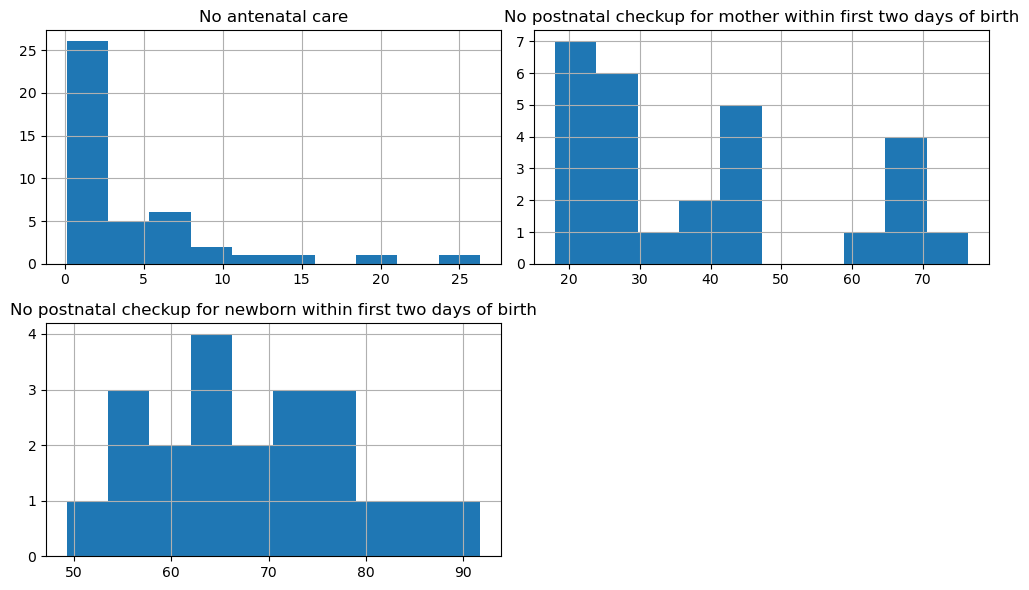

In [35]:
# Select the columns:
columns = ["No antenatal care",                                                                                                                                                   
"No postnatal checkup for mother within first two days of birth" ,                              
"No postnatal checkup for newborn within first two days of birth" ]

# Create histograms
df[columns].hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

# Box Plot for Antenatal / Postnatal Checkup by Place

In [36]:
# Box Plot for Antenatal / Postnatal Checkup and "Name"

# Columns to create box plots for
columns = ["No antenatal care",                                                                                                                                                   
"No postnatal checkup for mother within first two days of birth" ,                              
"No postnatal checkup for newborn within first two days of birth" ]

# Generate custom colors for each unique value in the 'Name' column
custom_colors = px.colors.qualitative.Plotly[:len(df['Name'].unique())]

# Create a figure for each column
figures = []
for column in columns:
    fig = px.box(df, x='Name', y=column, title=f'Box Plot for "{column}" and Place',
                 color='Name', color_discrete_sequence=custom_colors)
    fig.update_layout(width=1000, height=600)
    figures.append(fig)

# Display all figures
for fig in figures:
    fig.show()

# Average Values for Antenatal / Postnatal Checkup by Place

In [37]:
# Average Values for Antenatal / Postnatal Checkup by "Name"

columns = ["No antenatal care",                                                                                                                                                   
"No postnatal checkup for mother within first two days of birth" ,                              
"No postnatal checkup for newborn within first two days of birth" ]

# Group by "Name" and calculate the mean for each column
average_data = df.groupby("Name")[columns].mean().reset_index()

# Melt the DataFrame to have a single "value" column for all columns to be plotted
average_data_melted = average_data.melt(id_vars=["Name"], var_name="Category", value_name="Average Value")

# Sort the data by "Average Value" in descending order
average_data_melted_sorted = average_data_melted.sort_values(by="Average Value", ascending=False)

# Create the bar chart using plotly
fig = px.bar(average_data_melted_sorted, x="Name", y="Average Value", color="Category",
             labels={"Name": "Name", "Average Value": "Average Value", "Category": "Category"},
             title="Average Values for Antenatal and Postnatal Checkup by Place")

# Set font size for x and y axis labels
fig.update_xaxes(title_font_size=12, tickfont_size=12)
fig.update_yaxes(title_font_size=12, tickfont_size=12)

# Rotate x-axis labels
# fig.update_xaxes(tickangle=90)

fig.show()

# Histogram Plots - Live Births

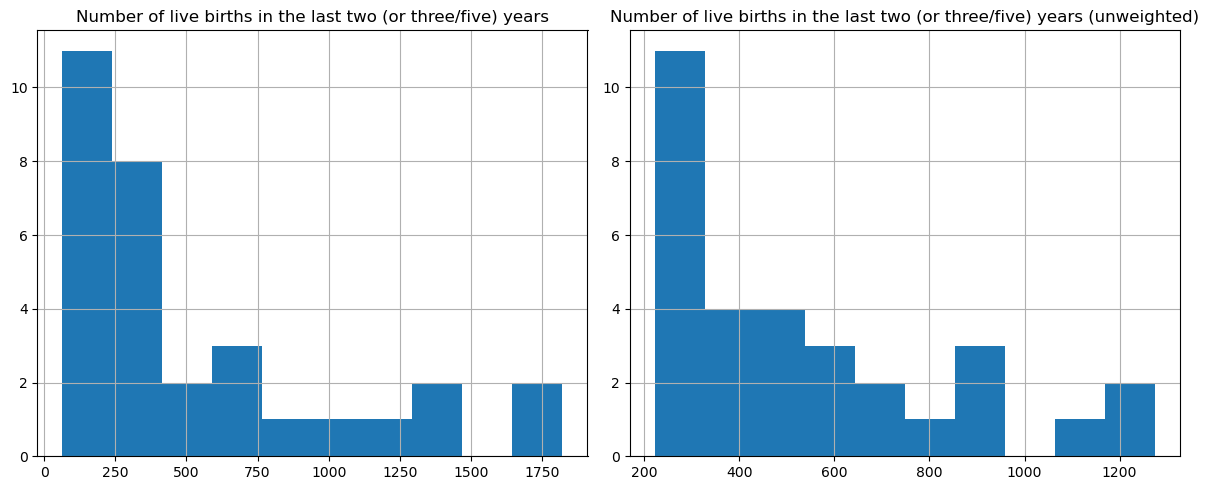

In [38]:
# Select the columns:
columns = ["Number of live births in the last two (or three/five) years" ,                                  
"Number of live births in the last two (or three/five) years (unweighted)"]

# Create histograms
df[columns].hist(figsize=(12, 5))
plt.tight_layout()
plt.show()

# Box Plot for Live Births by Place

In [39]:
# Box Plot  for live Births and "Name"

# Columns to create box plots for
columns = ["Number of live births in the last two (or three/five) years" ,                                  
"Number of live births in the last two (or three/five) years (unweighted)"]

# Generate custom colors for each unique value in the 'Name' column
custom_colors = px.colors.qualitative.Plotly[:len(df['Name'].unique())]

# Create a figure for each column
figures = []
for column in columns:
    fig = px.box(df, x='Name', y=column, title=f'Box Plot for "{column}" and Place',
                 color='Name', color_discrete_sequence=custom_colors)
    fig.update_layout(width=1000, height=600)
    figures.append(fig)

# Display all figures
for fig in figures:
    fig.show()

# Average Values for Live Births by Place

In [40]:
# Average Values for live births by "Name"

columns = ["Number of live births in the last two (or three/five) years" ,                                  
"Number of live births in the last two (or three/five) years (unweighted)" ]

# Group by "Name" and calculate the mean for each column
average_data = df.groupby("Name")[columns].mean().reset_index()

# Melt the DataFrame to have a single "value" column for all columns to be plotted
average_data_melted = average_data.melt(id_vars=["Name"], var_name="Category", value_name="Average Value")

# Sort the data by "Average Value" in descending order
average_data_melted_sorted = average_data_melted.sort_values(by="Average Value", ascending=False)

# Create the bar chart using plotly
fig = px.bar(average_data_melted_sorted, x="Name", y="Average Value", color="Category",
             labels={"Name": "Name", "Average Value": "Average Value", "Category": "Category"},
             title="Average Values for Live Births by Place")

# Set font size for x and y axis labels
fig.update_xaxes(title_font_size=12, tickfont_size=12)
fig.update_yaxes(title_font_size=12, tickfont_size=12)

# Rotate x-axis labels
# fig.update_xaxes(tickangle=90)

fig.show()

# Histogram Plots - Mothers and Newborns

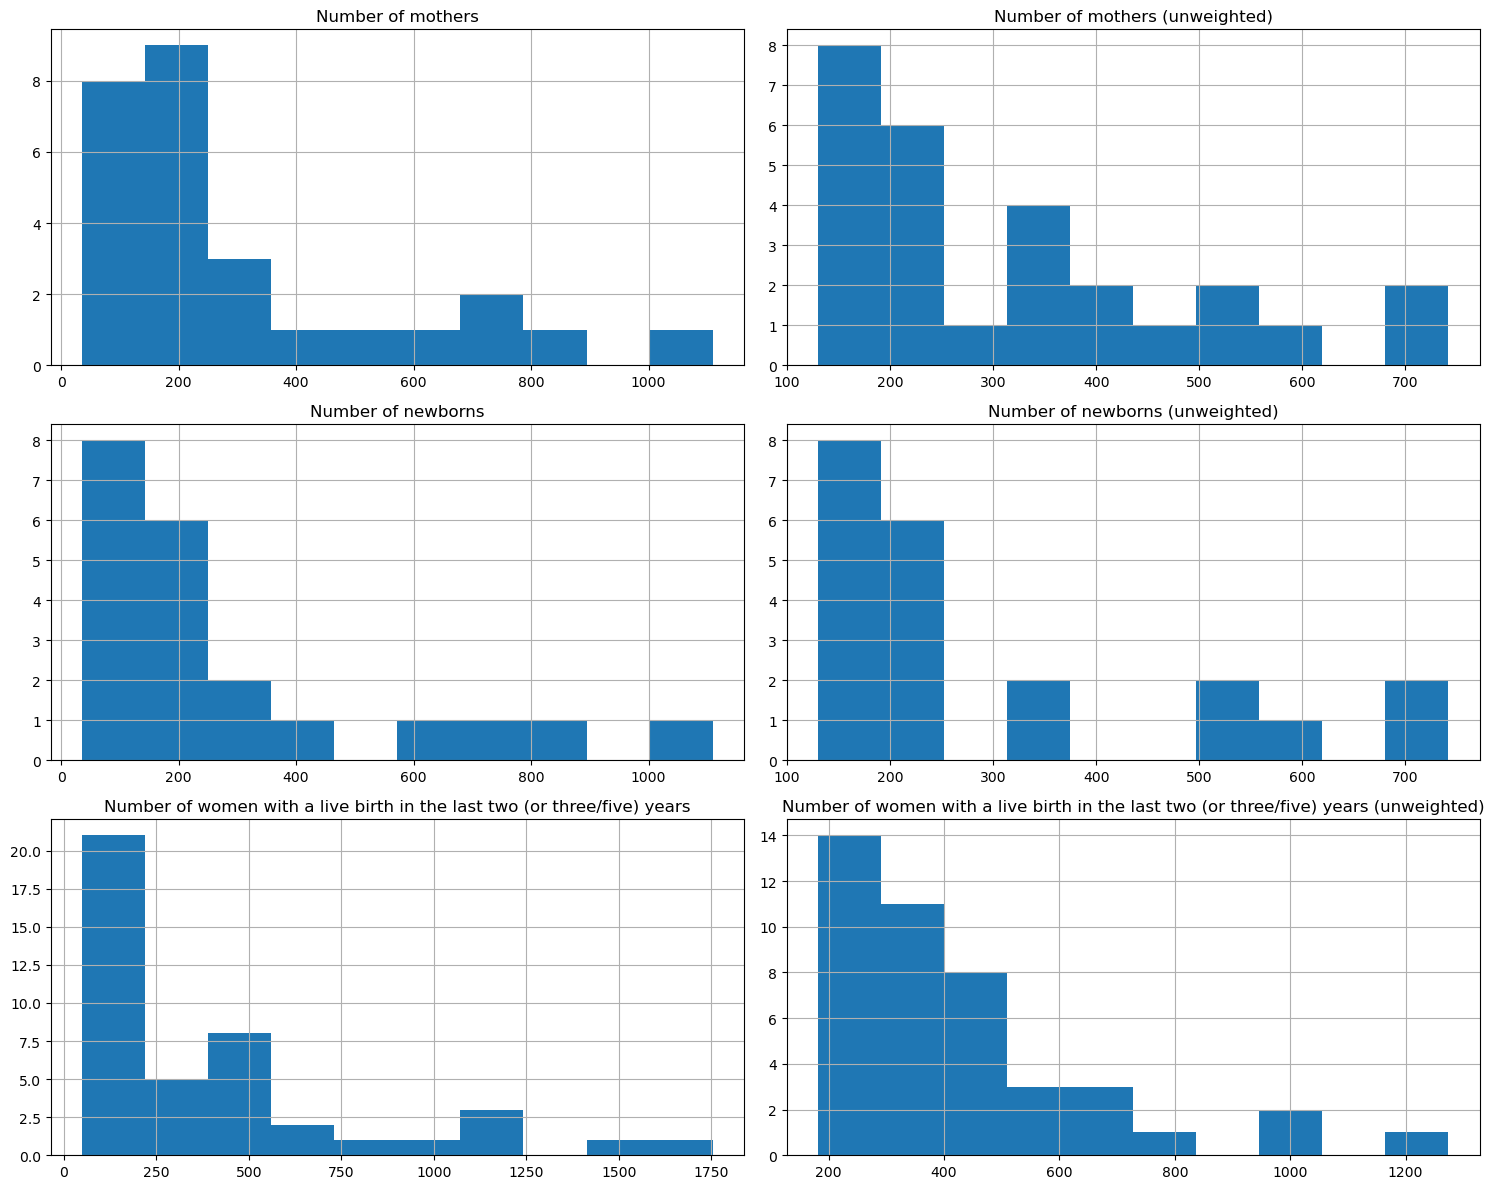

In [41]:
# Select the columns:
columns = ["Number of mothers",                                                                              
"Number of mothers (unweighted)" ,                                                               
"Number of newborns" ,                                                                            
"Number of newborns (unweighted)",                                                               
"Number of women with a live birth in the last two (or three/five) years" ,                      
"Number of women with a live birth in the last two (or three/five) years (unweighted)" ]

# Create histograms
df[columns].hist(figsize=(15, 12))
plt.tight_layout()
plt.show()

# Box Plot for Mothers and Newborns by Place

In [42]:
# Box Plot  for Mothers and Newborns and "Name"

# Columns to create box plots for
columns = ["Number of mothers",                                                                              
"Number of mothers (unweighted)" ,                                                               
"Number of newborns" ,                                                                            
"Number of newborns (unweighted)",                                                               
"Number of women with a live birth in the last two (or three/five) years" ,                      
"Number of women with a live birth in the last two (or three/five) years (unweighted)" ]

# Generate custom colors for each unique value in the 'Name' column
custom_colors = px.colors.qualitative.Plotly[:len(df['Name'].unique())]

# Create a figure for each column
figures = []
for column in columns:
    fig = px.box(df, x='Name', y=column, title=f'Box Plot for "{column}" and Place',
                 color='Name', color_discrete_sequence=custom_colors)
    fig.update_layout(width=1000, height=600)
    figures.append(fig)

# Display all figures
for fig in figures:
    fig.show()

# Average Values for Mothers and Newborns by Place

In [43]:
# Average Values for Mothers and Newborns by "Name"

columns = ["Number of mothers",                                                                              
"Number of mothers (unweighted)" ,                                                               
"Number of newborns" ,                                                                            
"Number of newborns (unweighted)",                                                               
"Number of women with a live birth in the last two (or three/five) years" ,                      
"Number of women with a live birth in the last two (or three/five) years (unweighted)" ]

# Group by "Name" and calculate the mean for each column
average_data = df.groupby("Name")[columns].mean().reset_index()

# Melt the DataFrame to have a single "value" column for all columns to be plotted
average_data_melted = average_data.melt(id_vars=["Name"], var_name="Category", value_name="Average Value")

# Sort the data by "Average Value" in descending order
average_data_melted_sorted = average_data_melted.sort_values(by="Average Value", ascending=False)

# Create the bar chart using plotly
fig = px.bar(average_data_melted_sorted, x="Name", y="Average Value", color="Category",
             labels={"Name": "Name", "Average Value": "Average Value", "Category": "Category"},
             title="Average Values for Mothers and Newborns by Place")

# Set font size for x and y axis labels
fig.update_xaxes(title_font_size=12, tickfont_size=12)
fig.update_yaxes(title_font_size=12, tickfont_size=12)

# Rotate x-axis labels
# fig.update_xaxes(tickangle=90)

fig.show()

# Histogram Plots - Delivery Place

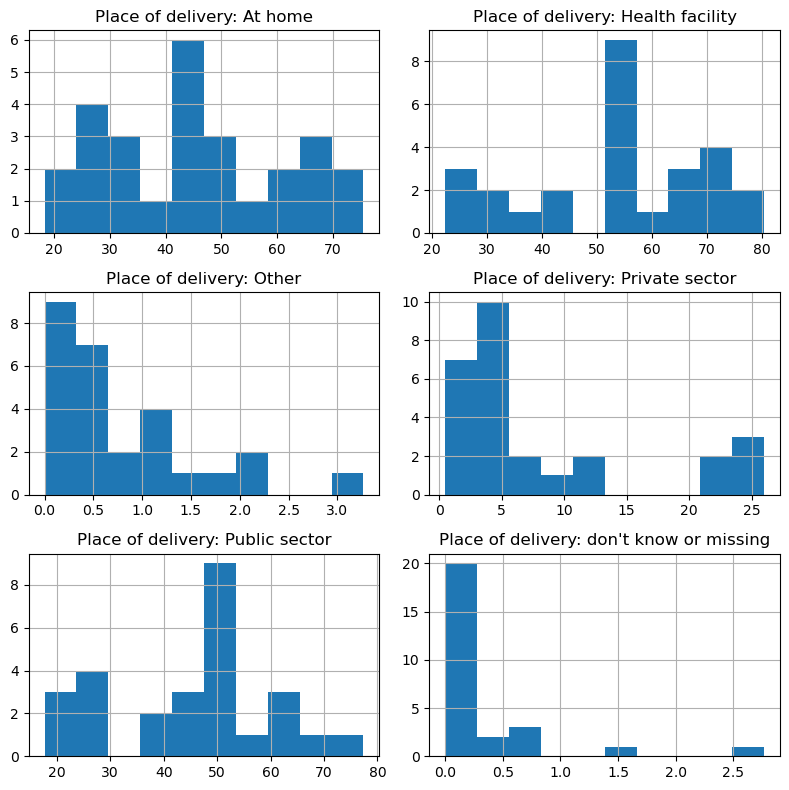

In [44]:
# Select the columns:
columns = ["Place of delivery: At home",                                                                   
"Place of delivery: Health facility" ,                                                          
"Place of delivery: Other" ,                                                                    
"Place of delivery: Private sector" ,                                                           
"Place of delivery: Public sector",                                                                                                                               
"Place of delivery: don't know or missing" ]

# Create histograms
df[columns].hist(figsize=(8, 8))
plt.tight_layout()
plt.show()

# Box Plot for Delivery Place Category

In [45]:
# Box Plot  for Delivery Place Category and "Name"

# Columns to create box plots for
columns = ["Place of delivery: At home",                                                                   
"Place of delivery: Health facility" ,                                                          
"Place of delivery: Other" ,                                                                    
"Place of delivery: Private sector" ,                                                           
"Place of delivery: Public sector",                                                                                                                               
"Place of delivery: don't know or missing" ]

# Generate custom colors for each unique value in the 'Name' column
custom_colors = px.colors.qualitative.Plotly[:len(df['Name'].unique())]

# Create a figure for each column
figures = []
for column in columns:
    fig = px.box(df, x='Name', y=column, title=f'Box Plot for "{column}" and Place',
                 color='Name', color_discrete_sequence=custom_colors)
    fig.update_layout(width=1000, height=600)
    figures.append(fig)

# Display all figures
for fig in figures:
    fig.show()

# Average Values for Delivery Place Category

In [46]:
# Average Values for Delivery Place Category by "Name"

columns = ["Place of delivery: At home",                                                                   
 "Place of delivery: Health facility" ,                                                          
  "Place of delivery: Other" ,                                                                    
  "Place of delivery: Private sector" ,                                                           
  "Place of delivery: Public sector",                                                                                                                             
  "Place of delivery: don't know or missing" ]

# Group by "Name" and calculate the mean for each column
average_data = df.groupby("Name")[columns].mean().reset_index()

# Melt the DataFrame to have a single "value" column for all columns to be plotted
average_data_melted = average_data.melt(id_vars=["Name"], var_name="Category", value_name="Average Value")

# Sort the data by "Average Value" in descending order
average_data_melted_sorted = average_data_melted.sort_values(by="Average Value", ascending=False)

# Create the bar chart using plotly
fig = px.bar(average_data_melted_sorted, x="Name", y="Average Value", color="Category",
             labels={"Name": "Name", "Average Value": "Average Value", "Category": "Category"},
             title="Average Values for Delivery Place")

# Set font size for x and y axis labels
fig.update_xaxes(title_font_size=12, tickfont_size=12)
fig.update_yaxes(title_font_size=12, tickfont_size=12)

# Rotate x-axis labels
# fig.update_xaxes(tickangle=90)

fig.show()

# Correlation Analysis

In [47]:
# Finding correlation:

numeric_df = df.select_dtypes(include=[np.number])
df_corr = numeric_df.corr(method='pearson')
#df_corr

In [48]:
#df_corr["Malaria prevalence according to RDT_df3"].sort_values(ascending=False)

In [49]:
# Remove NaN , Sorting:
sorted_df = df_corr["Malaria prevalence according to RDT_df3"].sort_values(ascending=False).dropna()

# Create DataFrame 
sorted_Corr_df = pd.DataFrame({'Column': sorted_df.index, 'Correlation': sorted_df.values})
sorted_Corr_df


Column  Correlation
0           Malaria prevalence according to RDT_x_df11     1.000000
1              Malaria prevalence according to RDT_df3     1.000000
2    Malaria prevalence according to microscopy_x_df11     0.874842
3       Malaria prevalence according to microscopy_df3     0.874842
4    Households with water 30 minutes or less away ...     0.755788
5    Population with water 30 minutes or less away ...     0.746513
6     Antenatal care provider: Auxiliary nurse/midwife     0.723255
7                    Women with primary education_df11     0.718615
8            SP/Fansidar 3+ doses during pregnancy_df3     0.709703
9         SP/Fansidar 3+ doses during pregnancy_x_df11     0.709703
10   Children with hemoglobin lower than 8.0 g/dl_x...     0.634656
11    Children with hemoglobin lower than 8.0 g/dl_df3     0.634656
12          Women who can read part of a sentence_df11     0.631472
13                      Children who took any ACT_df11     0.619441
14                       Children who took any ACT_df3     0.619441
15   Pregnant women who slept under an insecticide-...     0.570124
16   Pregnant women who slept under an insecticide-...     0.570124
17                        Children with any anemia_df3     0.555737
18   Number of children with fever in the last two ...     0.532373
19         Pregnant women who slept under any net_df11     0.530430
20   Households with at least one insecticide-treat...     0.521424
21              Antenatal care provider: Nurse/midwife     0.518760
22   Children with fever who took a combination wit...     0.481024
23   Pregnant women who slept under an insecticide-...     0.477449
24   SP/Fansidar 2+ doses, at least one during ANC ...     0.474842
25   Mean number of insecticide-treated mosquito ne...     0.474196
26   Number of insecticide-treated mosquito nets (I...     0.467420
27   Persons with access to an insecticide-treated ...     0.463527
28   Persons with access to an insecticide-treated ...     0.463527
29     Mean number of mosquito nets per household_df11     0.462738
30   Population who slept under an insecticide-trea...     0.458288
31   Population who slept under an insecticide-trea...     0.458288
32   Households with at least one insecticide-treat...     0.453820
33                 Households using surface water_df11     0.450488
34                 Population using surface water_df11     0.446609
35   Households with at least one insecticide-treat...     0.438298
36   Households with at least one insecticide-treat...     0.438298
37                   Antenatal care provider: Missing      0.437870
38   Population who slept under any net last night_...     0.427559
39           Households using a tubewell/borehole_df11     0.417689
40      Households with at least one mosquito net_df11     0.414715
41   Households with at least one insecticide-treat...     0.408930
42   Households with at least one insecticide-treat...     0.408930
43   Households with at least one mosquito net for ...     0.406732
44                      Antenatal care provider: Other     0.399710
45           Population using a tubewell/borehole_df11     0.394221
46   Children under 5 who slept under an insecticid...     0.393024
47   Children under 5 who slept under an insecticid...     0.393024
48   Number of persons living in a household with a...     0.380120
49                   Women who cannot read at all_df11     0.378532
50   Population who slept under an insecticide-trea...     0.371451
51   Number of children under 5 in households with ...     0.357787
52   Mean number of long-lasting insecticide-treate...     0.356153
53   Pregnant women who slept under a long-lasting ...     0.355149
54       Children under 5 who slept under any net_df11     0.346843
55   Pregnant women who slept under insecticide-tre...     0.342250
56   Households with at least one long-lasting inse...     0.339898
57                                                Year     0.335878
58                         Postneona

In [50]:
# Compare columns:
comparison = df['Malaria prevalence according to RDT_x_df11'] == df['Malaria prevalence according to RDT_df3']

# Calculate the percentage of values that are the same
percentage_same = (comparison.sum() / len(df)) * 100

# Calculate the percentage of values that are different
percentage_different = 100 - percentage_same

print(f"Percentage of values that are the same: {percentage_same:.2f}%")
print(f"Percentage of values that are different: {percentage_different:.2f}%")


Percentage of values that are the same: 23.68%
Percentage of values that are different: 76.32%


# Top 20 Features Positively Correlated with 'Malaria Prevalence"

In [51]:
sorted_Corr_df[:20]

Column  Correlation
0          Malaria prevalence according to RDT_x_df11     1.000000
1             Malaria prevalence according to RDT_df3     1.000000
2   Malaria prevalence according to microscopy_x_df11     0.874842
3      Malaria prevalence according to microscopy_df3     0.874842
4   Households with water 30 minutes or less away ...     0.755788
5   Population with water 30 minutes or less away ...     0.746513
6    Antenatal care provider: Auxiliary nurse/midwife     0.723255
7                   Women with primary education_df11     0.718615
8           SP/Fansidar 3+ doses during pregnancy_df3     0.709703
9        SP/Fansidar 3+ doses during pregnancy_x_df11     0.709703
10  Children with hemoglobin lower than 8.0 g/dl_x...     0.634656
11   Children with hemoglobin lower than 8.0 g/dl_df3     0.634656
12         Women who can read part of a sentence_df11     0.631472
13                     Children who took any ACT_df11     0.619441
14                      Children who took any ACT_df3     0.619441
15  Pregnant women who slept under an insecticide-...     0.570124
16  Pregnant women who slept under an insecticide-...     0.570124
17                       Children with any anemia_df3     0.555737
18  Number of children with fever in the last two ...     0.532373
19        Pregnant women who slept under any net_df11     0.530430

# Top 20 Features Negatively Correlated with 'Malaria Prevalence"

In [52]:
top_20_negative_correlations = sorted_Corr_df.sort_values(by='Correlation').head(20)
top_20_negative_correlations

Column  Correlation
179                   Measles vaccination received_df3    -0.828121
178  Population with an improved sanitation facilit...    -0.773521
177              Child took antibiotic drugs for fever    -0.762872
176                                    Number of women    -0.749274
175         Households with water on the premises_df11    -0.722024
174         Population with water on the premises_df11    -0.714109
173      Antenatal visits for pregnancy: 4+ visits_df3    -0.690937
172                            Neonatal mortality rate    -0.676854
171                        Neonatal mortality rate_df3    -0.676854
170    Population using water piped into dwelling_df11    -0.663366
169       Population using a public tap/standpipe_df11    -0.657368
168       Households using a public tap/standpipe_df11    -0.656645
167                    Antenatal care provider: Doctor    -0.643896
166    Women with secondary or higher education_x_df11    -0.632026
164            Received all 8 basic vaccinations_y_df3    -0.630763
165            Received all 8 basic vaccinations_x_df3    -0.630763
163                 Population using tanker truck_df11    -0.619222
162                 Households using tanker truck_df11    -0.596996
161           Households using other water source_df11    -0.576391
160           Population using other water source_df11    -0.567715